<a href="https://colab.research.google.com/github/kkokay07/Learning-Machine-Learning/blob/main/Random%20Regression/Non_linear_models_bit_Advanced_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Non-linear Regression Models

## 1. Logistic Regression

### Mathematical Foundation
```python
P(y=1|X) = 1 / (1 + e^(-β₀ - β₁X₁ - ... - βₙXₙ))
```

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       133
           1       0.00      0.00      0.00        67

    accuracy                           0.67       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.44      0.67      0.53       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


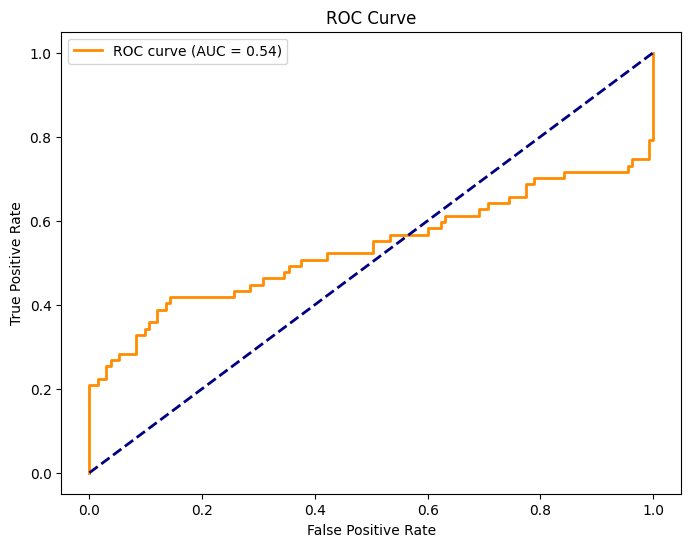

In [1]:
### Implementation Example
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
n_samples = 1000

# Create features
X = np.random.randn(n_samples, 2)
# Create non-linear decision boundary
y = (X[:, 0]**2 + X[:, 1]**2 > 2).astype(int)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Key Features:
1. Binary outcome prediction
2. Probability estimation
3. Easy to interpret
4. Handles non-linear decision boundaries with feature engineering

## 2. Support Vector Regression (SVR)

### Mathematical Foundation
SVR minimizes:
```
min 1/2||w||² + C∑(ξᵢ + ξᵢ*)
subject to:
|yi - (w·xi + b)| ≤ ε + ξᵢ
ξᵢ, ξᵢ* ≥ 0
```

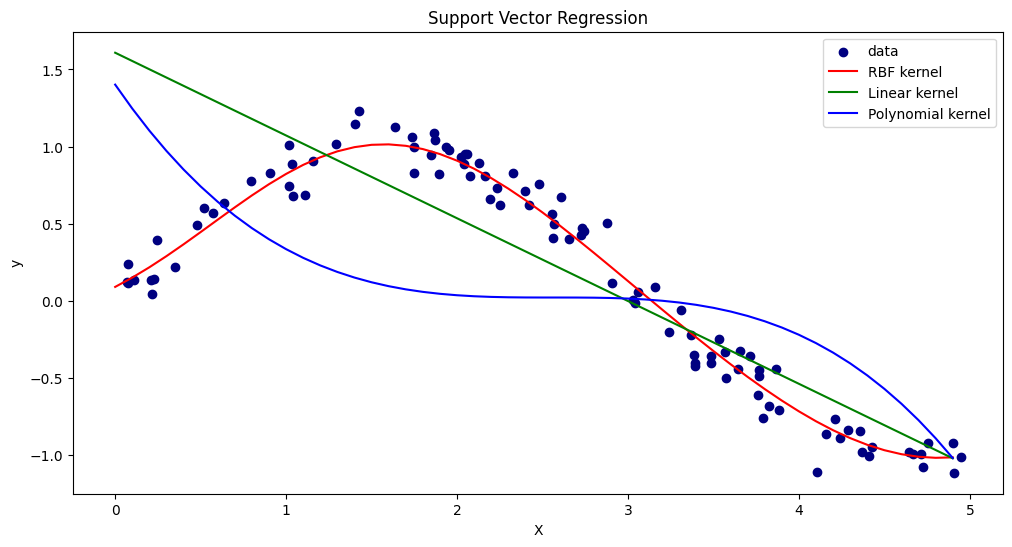

In [2]:
### Implementation Example
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Generate non-linear data
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train different kernel SVRs
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)

# Fit models
svr_rbf.fit(X_scaled, y)
svr_linear.fit(X_scaled, y)
svr_poly.fit(X_scaled, y)

# Predictions
X_test = np.arange(0, 5, 0.1)[:, np.newaxis]
X_test_scaled = scaler.transform(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='navy', label='data')
plt.plot(X_test, svr_rbf.predict(X_test_scaled), color='red', label='RBF kernel')
plt.plot(X_test, svr_linear.predict(X_test_scaled), color='green', label='Linear kernel')
plt.plot(X_test, svr_poly.predict(X_test_scaled), color='blue', label='Polynomial kernel')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Key Features:
1. Handles non-linear relationships through kernels
2. Robust to outliers
3. Works well with high-dimensional data
4. Support for different kernel functions

## 3. Decision Tree Regression

### Mathematical Foundation
Minimizes impurity measure (e.g., MSE):
```
MSE = 1/n ∑(yi - ȳ)²
```

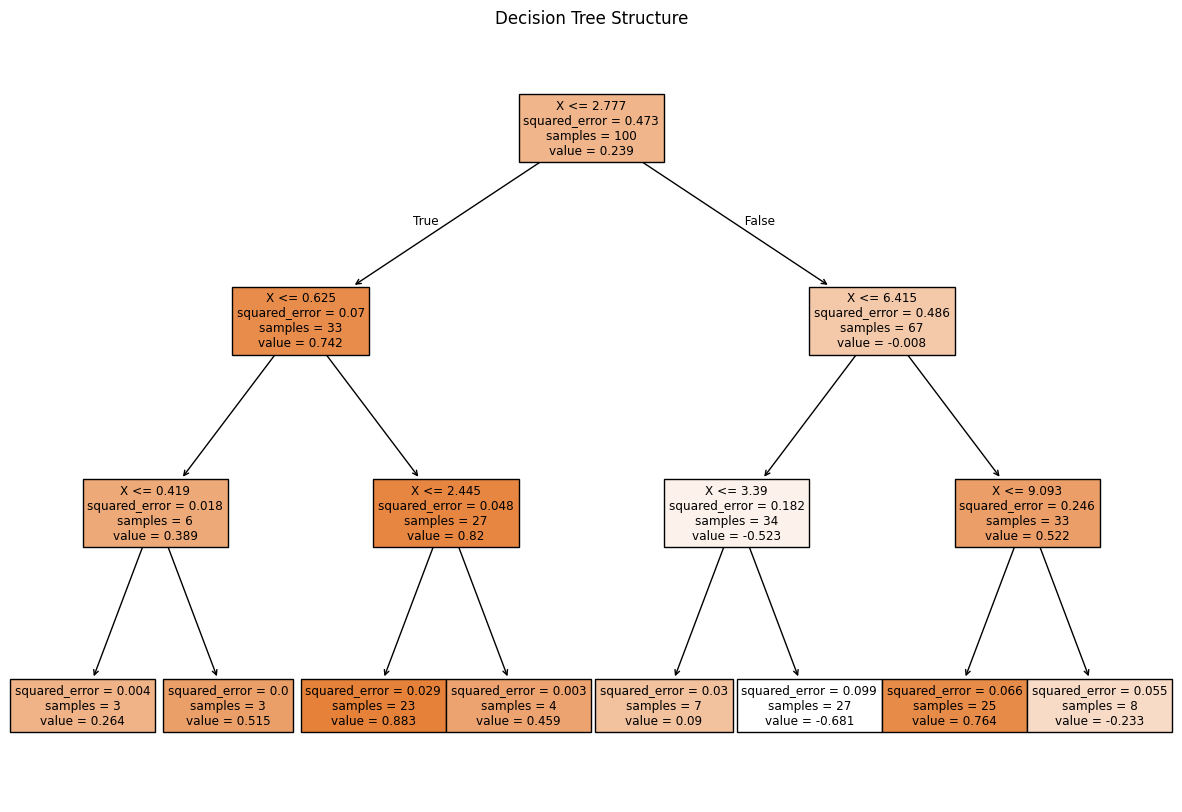

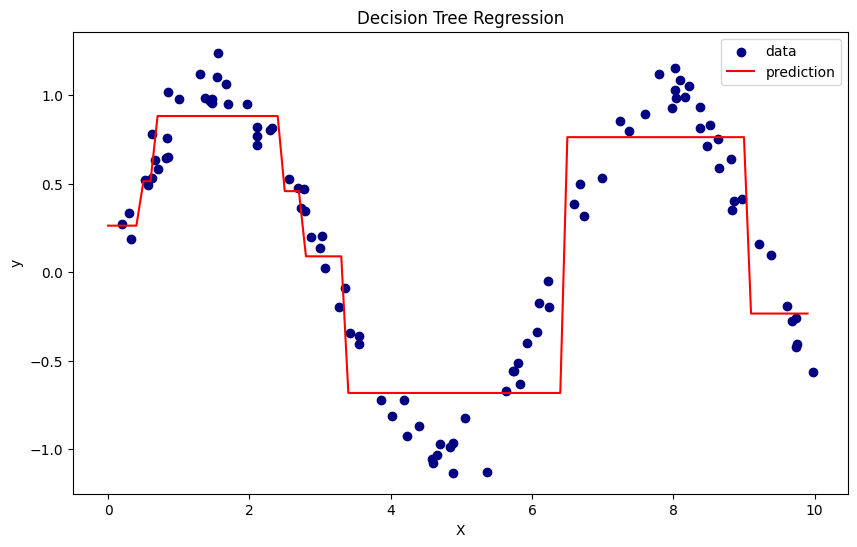

In [3]:
### Implementation Example
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Generate sample data
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Train model
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

# Visualize tree structure
plt.figure(figsize=(15, 10))
plot_tree(tree_reg, filled=True, feature_names=['X'])
plt.title('Decision Tree Structure')
plt.show()

# Plot predictions
X_test = np.arange(0, 10, 0.1)[:, np.newaxis]
y_pred = tree_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='navy', label='data')
plt.plot(X_test, y_pred, color='red', label='prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

### Key Features:
1. No assumption about data distribution
2. Handles non-linear relationships
3. Feature importance calculation
4. Easy to interpret

## 4. Random Forest Regression

### Mathematical Foundation
Ensemble of decision trees with:
1. Bootstrap sampling
2. Random feature selection
3. Averaging predictions


Feature Importance:
  feature  importance
0      X0    0.659478
1      X1    0.340522


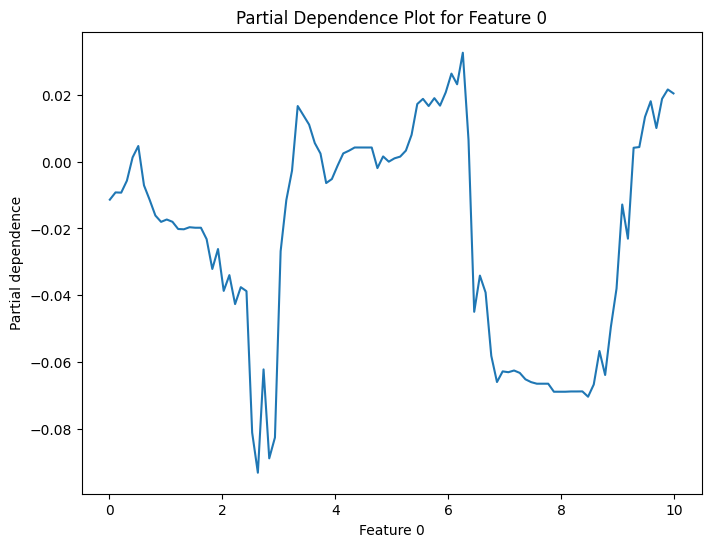

In [4]:
### Implementation Example
from sklearn.ensemble import RandomForestRegressor

# Generate complex non-linear data
X = np.random.rand(1000, 2) * 10
y = np.sin(X[:, 0]) * np.cos(X[:, 1]) + np.random.normal(0, 0.1, X.shape[0])

# Train model
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_reg.fit(X, y)

# Feature importance
importance = pd.DataFrame({
    'feature': [f'X{i}' for i in range(X.shape[1])],
    'importance': rf_reg.feature_importances_
})
print("\nFeature Importance:")
print(importance.sort_values('importance', ascending=False))

# Partial dependence plot
def plot_partial_dependence(model, X, feature_idx):
    x_vals = np.linspace(X[:, feature_idx].min(), X[:, feature_idx].max(), 100)
    X_plot = X.copy()
    y_vals = []

    for x_val in x_vals:
        X_plot[:, feature_idx] = x_val
        y_vals.append(model.predict(X_plot).mean())

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals)
    plt.xlabel(f'Feature {feature_idx}')
    plt.ylabel('Partial dependence')
    plt.title(f'Partial Dependence Plot for Feature {feature_idx}')
    plt.show()

plot_partial_dependence(rf_reg, X, 0)

### Key Features:
1. Handles high-dimensional data
2. Reduces overfitting
3. Feature importance
4. Parallel processing

## 5. Neural Network Regression

### Mathematical Foundation
Multi-layer perceptron with backpropagation:
```python
output = activation(W₂ * activation(W₁X + b₁) + b₂)
```

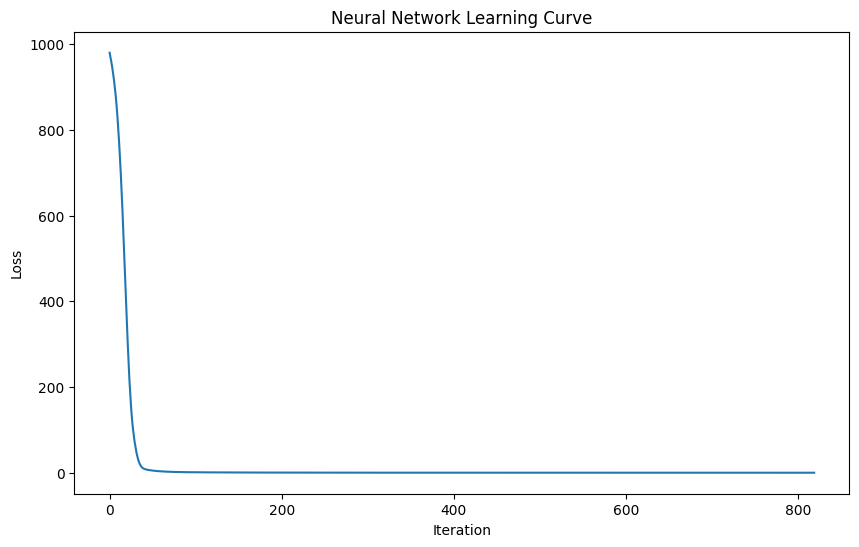

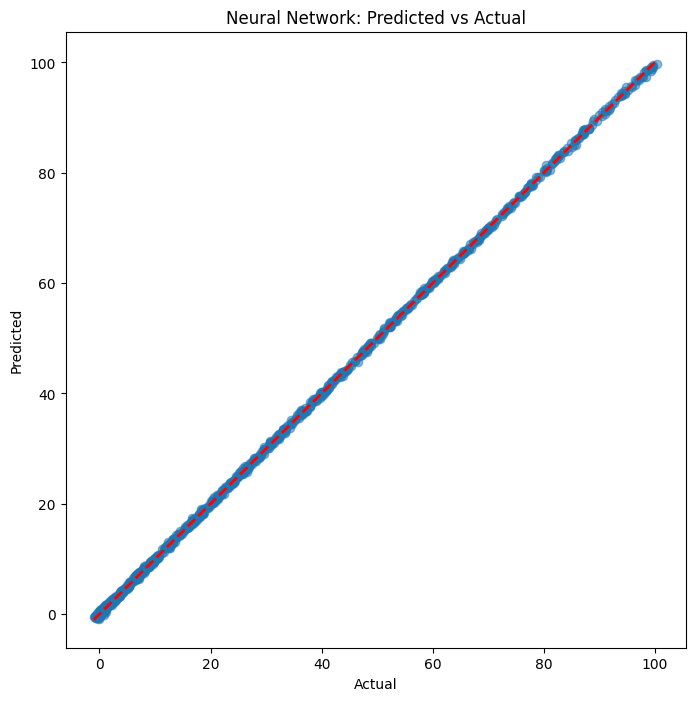

In [5]:
### Implementation Example
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Generate complex data
X = np.random.rand(1000, 3) * 10
y = np.sin(X[:, 0]) * np.cos(X[:, 1]) + X[:, 2]**2 + np.random.normal(0, 0.1, X.shape[0])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
nn_reg = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    learning_rate_init=0.001
)
nn_reg.fit(X_scaled, y)

# Learning curve
plt.figure(figsize=(10, 6))
plt.plot(nn_reg.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Neural Network Learning Curve')
plt.show()

# Predictions vs Actual
y_pred = nn_reg.predict(X_scaled)
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Predicted vs Actual')
plt.show()

### Key Features:
1. Can learn complex patterns
2. Automatic feature extraction
3. Scalable to large datasets
4. Flexible architecture

In [6]:
## Model Comparison and Selection
from sklearn.model_selection import cross_val_score

models = {
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50))
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    results[name] = {
        'mean_score': scores.mean(),
        'std_score': scores.std()
    }

results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model Comparison:
                mean_score  std_score
SVR               0.938758   0.014133
Decision Tree     0.998786   0.000151
Random Forest     0.999557   0.000035
Neural Network    0.998204   0.000447


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Best Practices

1. **Model Selection Guidelines:**
   - Use Logistic Regression for binary outcomes
   - Use SVR for non-linear patterns with few features
   - Use Random Forest for complex relationships
   - Use Neural Networks for large datasets

2. **Feature Engineering:**
   - Scale features appropriately
   - Handle missing values
   - Create interaction terms
   - Polynomial features when needed

3. **Hyperparameter Tuning:**
   - Use cross-validation
   - Grid or random search
   - Consider computational cost
   - Monitor for overfitting

4. **Validation Strategies:**
   - Hold-out validation
   - K-fold cross-validation
   - Time series split
   - Nested cross-validation